# Probability Distributions

Probability distribution tells you about the probability of drawing a certain value or range of values when selecting randomly from the distribution. A distribution could be discrete or continuous depending on the random variable. An example of a discrete random variable is tossing a dice (values are discrete between 1 and 6). An example of a continuous random variable is the amount of sugar in a cup of coffee.

From the law of probability, the sum of each probability in the distribution must equal to 1 or in the continuous case, the integral of the probability density function must be 1 (area under the curve).

We will focus on the popular probability distribution that are relavant to Data Science and Machine Learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Uniform Distribution

The uniform distribution is the most simple distribution. In the discrete case, there is an equal probability of drawing a number. For an example, rolling a fair die would considered a uniform distribution. In mathematical terms we could represent this as:

$$P(X=x_i) = \frac{1}{n} \ \ \forall x_i \ \ and \ \ i \in \{1, 2, .. n\}$$

The continuous version of this is:

$$f(x) = \frac{1}{b-a} \ \ for \ \ a < x < b, \ \ 0 \ \ otherwise$$

The mean is therefore, $\mu = (b+a) / 2$. and the variance is $\sigma^2 = (a – b)^2/12$ 

To draw samples from a discrete uniform distribtion you could do the following (the following mimics rolling a fair dice).

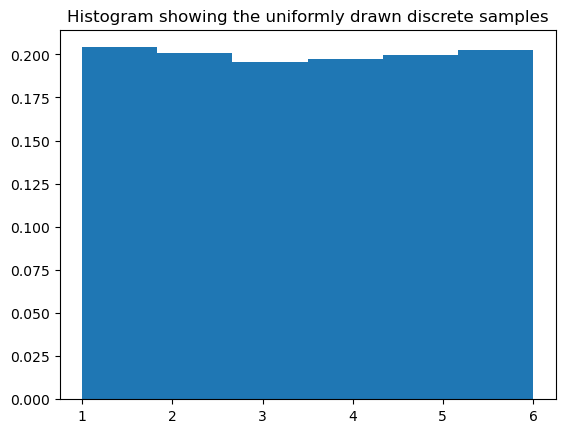

In [2]:
samples = np.random.randint(1, 7, 10000)
plt.hist(samples, density=True, bins=6)
plt.title("Histogram showing the uniformly drawn discrete samples")
plt.show()

To draw from a continous uniform distribution, you could do the following.

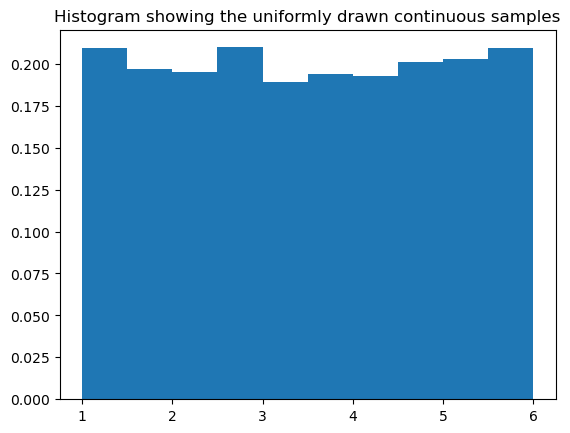

Sample mean: 3.502469282258537
Sample std: 1.457593247731931
Theoretical mean: 3.5
Theoretical std: 1.4433756729740645


In [3]:
a = 1
b = 6
samples = a + np.random.rand(10000) * (b - a)
plt.hist(samples, density=True)
plt.title("Histogram showing the uniformly drawn continuous samples")
plt.show()

print("Sample mean:", np.mean(samples))
print("Sample std:", np.std(samples))

print("Theoretical mean:", (b + a) / 2)
print("Theoretical std:", np.sqrt((a - b)**2 / 12))

## The Gaussian Distribution

We will be introducing descriptive stats through the Gaussian distribution. The Gaussian (normal) distribution is a widely used distribution and one of the most analysed probability distributions function. This is due to the concept of the `central limit theorem` which says:

- With a large enough sample, the distribution of the samples will greatly approximate a Gaussian distribution.

Thus, it is very common to assume a Gaussian distribution when you do not have time or means to analyse the exact distribution of your samples or parameter spaces etc.

The Gaussian can be written in the form:
$$f(x) = \frac{1}{(\sigma \sqrt{2π})} e^{-(x - \mu)^2 / (2\sigma^2)}$$

Where $\mu$ and $\sigma$ represents the mean and the standard deviation of the Gaussian distribution. We will cover the mean and standard deviation in the upcoming sections. The standard Gaussian distribtion is written as $X \sim N(0,1)$ which is a zero mean Gaussian with a standard deviation of 1.

This is implemented in the code below:

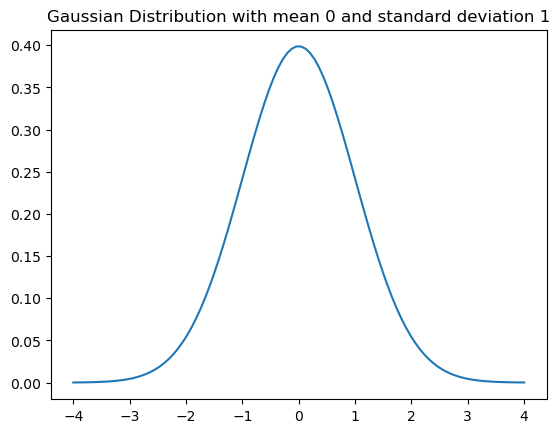

In [4]:
mean = 0
std = 1

x = np.linspace(-4, 4, 100)
y = np.exp(-((x - mean) ** 2 / (2 * std ** 2))) / (std * np.sqrt(2 * np.pi))
plt.plot(x, y)
plt.title(f"Gaussian Distribution with mean {mean} and standard deviation {std}")
plt.show()

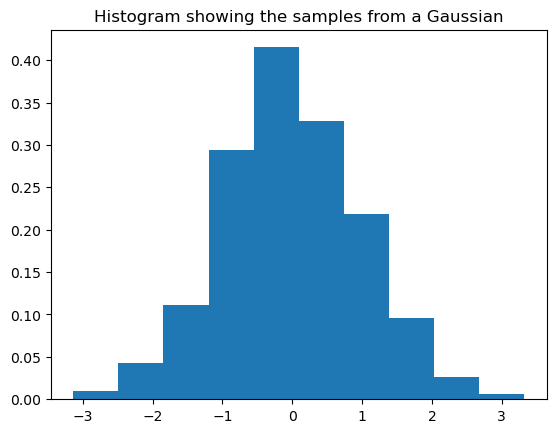

In [5]:
samples = np.random.randn(1000)
plt.hist(samples, density=True)
plt.title("Histogram showing the samples from a Gaussian")
plt.show()

To draw from any Gaussian distribution we first draw samples from the standard Gaussian, then shift it by the mean and scale by the standard deviation:

$$X_{target} = \sigma X_{drawn} + \mu$$

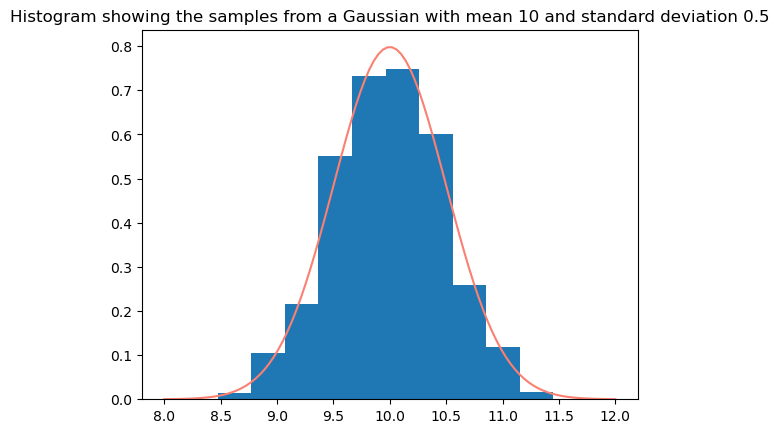

In [6]:
mean = 10
std = 0.5

samples = std * np.random.randn(1000) + mean  # You could also just use np.random.normal(mean, std, 1000)

x = np.linspace(8, 12, 100)
y = np.exp(-((x - mean) ** 2 / (2 * std ** 2))) / (std * np.sqrt(2 * np.pi))
plt.hist(samples, density=True, label="samples")
plt.plot(x, y, color="salmon", label="Actual distibution")
plt.title(f"Histogram showing the samples from a Gaussian with mean {mean} and standard deviation {std}")
plt.show()

## Bernoulli Distribution

The Bernoulli distribution concerns binary problems where the outcome could be a True or a False. Its probability mass function is therefore:

$$
P(X = x) = \begin{cases} 
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 
\end{cases}
$$

where:
- $X$ is a random variable following a Bernoulli distribution,
- $p$ is the probability of success (where $ 0 \leq p \leq 1 $),
- $x$ is the outcome of the random variable (either 0 or 1).

The mean of the Bernoulli distribution is therefore $\mu = p$. The variance is $\sigma^2 = p(1-p)$.

The Bernoulli distribution is very useful in conditions where we are answering yes or no questions. A good use case for the Bernoulli distribution is the use decode a transmitted binary data.

You can mimic the behaviour of a Bernoulli distribution by using the uniform distribution between 0 and 1.

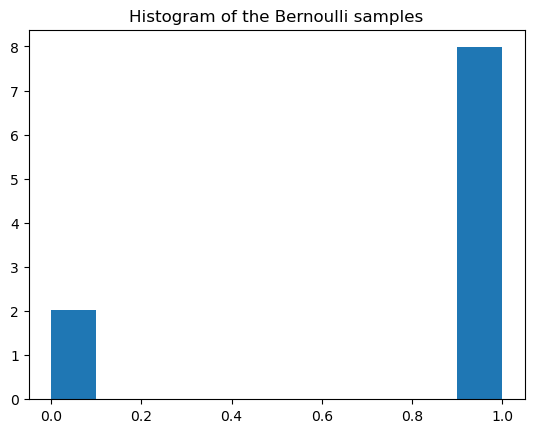

Sample mean: 0.7981
Sample std: 0.401417974186508
Theoretical mean: 0.8
Theoretical std: 0.39999999999999997


In [7]:
p = 0.8
samples = [0 if i > p else 1 for i in np.random.rand(10000)]
plt.hist(samples, density=True)
plt.title("Histogram of the Bernoulli samples")
plt.show()

print("Sample mean:", np.mean(samples))
print("Sample std:", np.std(samples))

print("Theoretical mean:", p)
print("Theoretical std:", np.sqrt(p*(1-p)))

## Binomial Distribution

The Binomial distribution concerns multiple trials of the Bernoulli distribution. That is, given that we undergo the same Bernoulli process $n$ times, what is the probability of getting $k$ number of successes. 

For example, if we toss a bias die with probability 0.6 once, we would be following the Bernoulli distribution. But if we toss it 10 times and ask what is the probability of getting heads 4 times, then we would following the Binomial distribution. The Binomial distribution is therefore a discrete distribution.

The PMF for the Binomial distribution is

$$
P(K=k | n, p) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

The mean and variance of the binomial distribution are $\mu = np$ and $\sigma^2 = np(1 - p)$.

To draw from the binomial distribution, we could use the numpy built-in function.

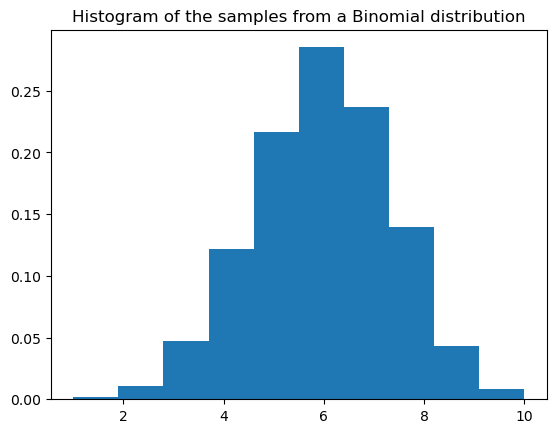

In [8]:
n = 10
p = 0.6

samples = np.random.binomial(n, p, size=10000)

plt.hist(samples, density=True)
plt.title("Histogram of the samples from a Binomial distribution")
plt.show()

Again, when number of samples is large you could approximate the Binomial distribution with a Gaussian using the theoretical mean and variance.

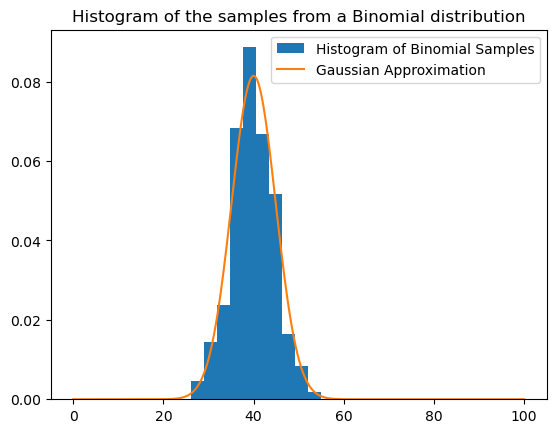

In [9]:
n = 100
p = 0.4
mean = n*p
std = np.sqrt(n*p*(1-p))
x = np.linspace(0, n, 1000)
y = np.exp(-((x - mean) ** 2 / (2 * std ** 2))) / (std * np.sqrt(2 * np.pi))

samples = np.random.binomial(n, p, size=1000)

plt.hist(samples, density=True, label="Histogram of Binomial Samples")
plt.plot(x, y, label="Gaussian Approximation")
plt.title("Histogram of the samples from a Binomial distribution")
plt.legend()
plt.show()

## Poisson Distribution

A Poisson process is a process in which the rate of occurence, $\lambda$ of a random event is constant. For an example, buses could arrive at a particular stop with a rate of 4 per hour. This does not mean the bus will definitely arrive at the stop exactly every 15 minutes but we would expect the bus to arrive around that time. Samples which are drawn from a Poisson process is said to form a Poisson distribution. In mathematical terms the PMF of a Poisson distribution is written as:

$$
P(X=x) = \frac{\lambda^x}{x!}e^{-\lambda}
$$

The mean of the Poisson distribution is $\lambda$ and the variance is $\lambda$.

To draw from a Poisson process, we can do the following.

C:\Users\paopa\AppData\Local\Temp\ipykernel_31556\4239396040.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(n)


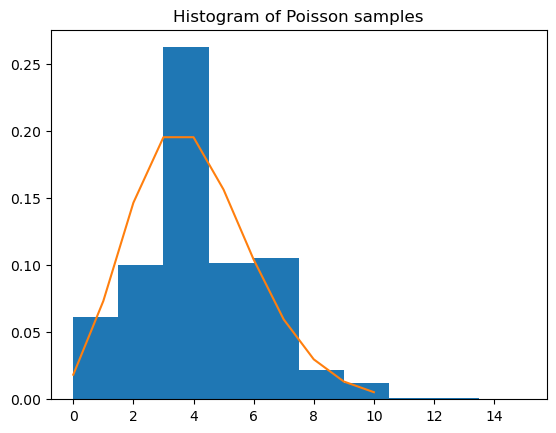

In [10]:
# Define a function to calculate factorial
def factorial(n):
    if n == 0:
        return 1
    else:
        return np.math.factorial(n)

rate = 4

x = np.linspace(0,10,11, dtype=int)
y = (rate ** x) / (np.vectorize(factorial)(x)) * np.exp(-rate)
samples = np.random.poisson(rate, 10000)
plt.hist(samples, density=True)
plt.plot(x, y)
plt.title("Histogram of Poisson samples")
plt.show()

Again, with a high enough rate, we can approximate a poisson distribution using the Gaussian with mean and variance $\lambda$.

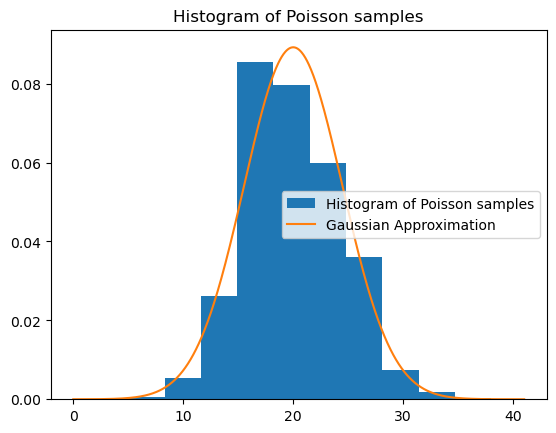

In [11]:
rate = 20
mean = rate
std = np.sqrt(rate)
x = np.linspace(0, rate*2 + 1, 1000)
y = np.exp(-((x - mean) ** 2 / (2 * std ** 2))) / (std * np.sqrt(2 * np.pi))

samples = np.random.poisson(rate, 10000)
plt.hist(samples, density=True, label="Histogram of Poisson samples")
plt.plot(x, y, label="Gaussian Approximation")
plt.title("Histogram of Poisson samples")
plt.legend()
plt.show()

## Exponential Distribution

The exponential distribution is used to model an exponential decaying process. For an example, the time a customer might take inside a store could be modelled using the Exponential distribution. In mathematical terms the PDF of the Exponential distribution is:

$$
f(x| \lambda) = \lambda e^{-\lambda x}
$$

$\lambda$ is the rate parameter, which is the average number of events per unit time. The mean and variance is $1/\lambda$ and $1/\lambda^2$.

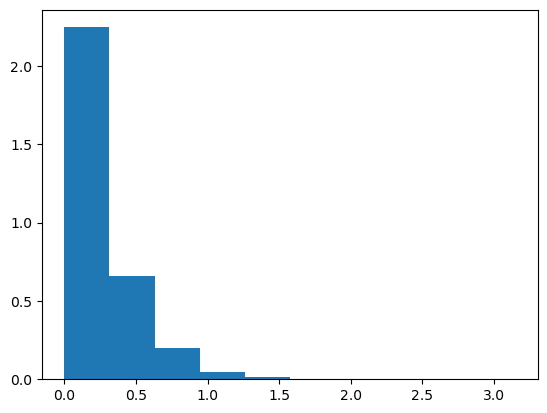

Sample mean: 0.25313933084666096
Sample std: 0.24889404899356757
Theoretical mean: 0.25
Theoretical std: 0.25


In [12]:
rate = 4
beta = 1 / rate

samples = np.random.exponential(beta, 10000)
plt.hist(samples, density=True)
plt.show()

print("Sample mean:", np.mean(samples))
print("Sample std:", np.std(samples))
print("Theoretical mean:", 1 / rate)
print("Theoretical std:", 1 / rate)

## Beta Distribution

The Beta distribution is a continuous probability distribution defined on the interval [0, 1]. It is often used to model random variables that represent proportions or probabilities, such as the success rate in a Bernoulli trial or the parameter of a binomial distribution. 

The Beta distribution is characterized by two shape parameters, typically denoted as α (alpha) and β (beta), both of which are positive real numbers. The probability density function (PDF) of the Beta distribution is given by:

$$ f(x; \alpha, \beta) = \frac{x^{\alpha - 1}(1 - x)^{\beta - 1}}{B(\alpha, \beta)} $$

Where:
- $x$ is the random variable, and $0 \leq x \leq 1$.
- $\alpha$ and $\beta$ are the shape parameters.
- $B(\alpha, \beta)$ is the Beta function, a normalisation~ constant ensuring that the total area under the curve equals 1.

The Beta function is defined as:

$$B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}(1 - t)^{\beta - 1} dt $$

The mean and variance of a Beta-distributed random variable are given by:

$ Mean = \frac{\alpha}{\alpha + \beta} $

$ Variance = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} $

The shape parameters $\alpha$ and $\beta$ determine the shape of the distribution. When both $\alpha$ and $\beta$ are equal to 1, the Beta distribution reduces to the uniform distribution on the interval [0, 1]. As $\alpha$ and $\beta$ increase, the distribution becomes more concentrated around the mean.

The Beta distribution is widely used in Bayesian statistics, econometrics, and various other fields for modeling continuous random variables that are bounded between 0 and 1.

In higher dimensions, the Beta distribution generalises to the Dirichlet distribution.


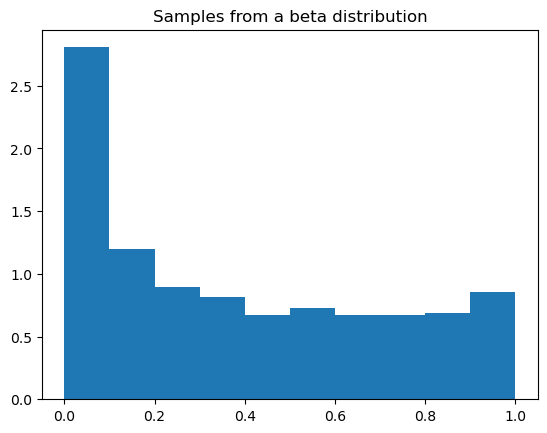

In [13]:
a = 0.5
b = 0.8
samples = np.random.beta(a, b, 10000)
plt.hist(samples, density=True)
plt.title("Samples from a beta distribution")
plt.show()